In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [14]:
df = pd.read_csv('./data/ABNB.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


In [15]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## Jumlah trading volume yang berubah tiap harinya

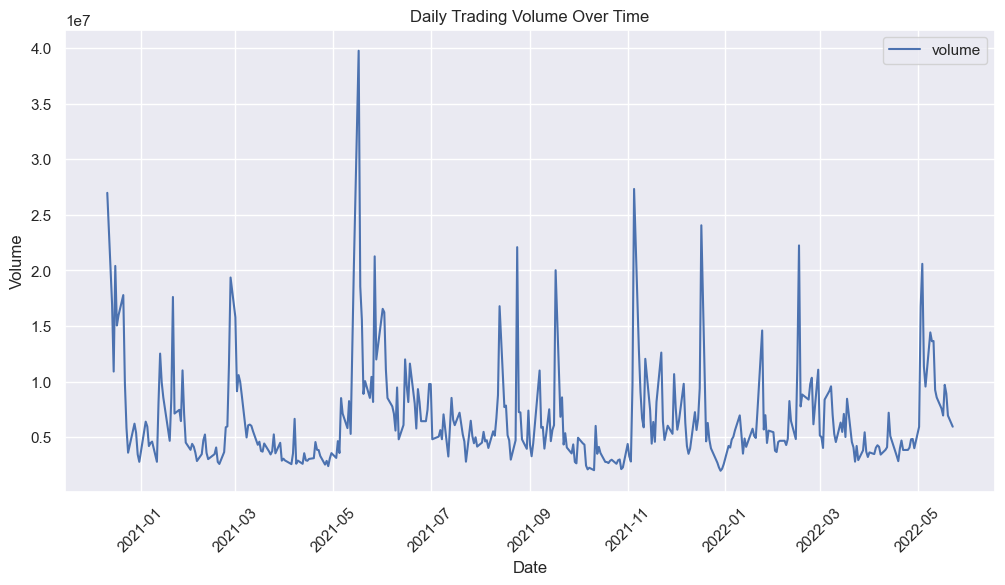

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label='volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Daily Trading Volume Over Time')
plt.xticks(rotation=45)

plt.grid(True)
plt.legend()
plt.show()

## Perubahan AirBnB Open Price Setiap harinya

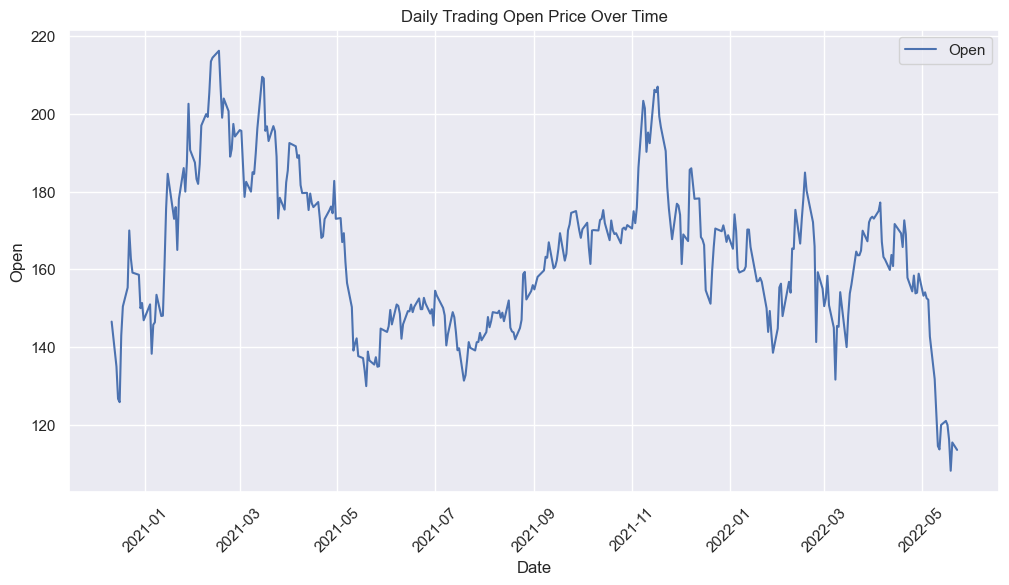

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label='Open')
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('Daily Trading Open Price Over Time')
plt.xticks(rotation=45)

plt.grid(True)
plt.legend()
plt.show()

## Perubahan AirBnb Price Setiap Harinya

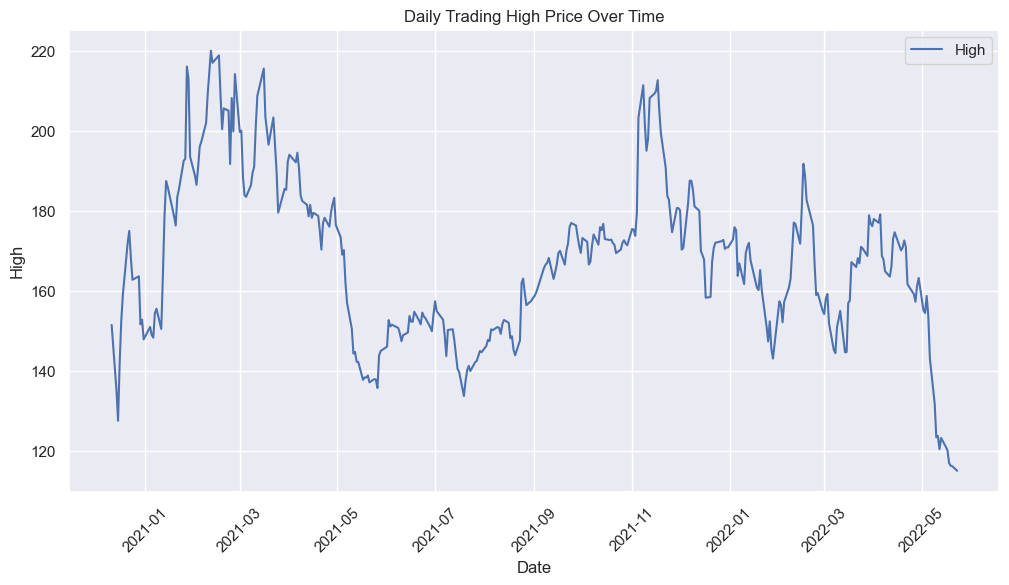

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['High'], label='High')
plt.xlabel('Date')
plt.ylabel('High')
plt.title('Daily Trading High Price Over Time')
plt.xticks(rotation=45)

plt.grid(True)
plt.legend()
plt.show()

## Perubahan AirBnB Low Price Setiap Harinya

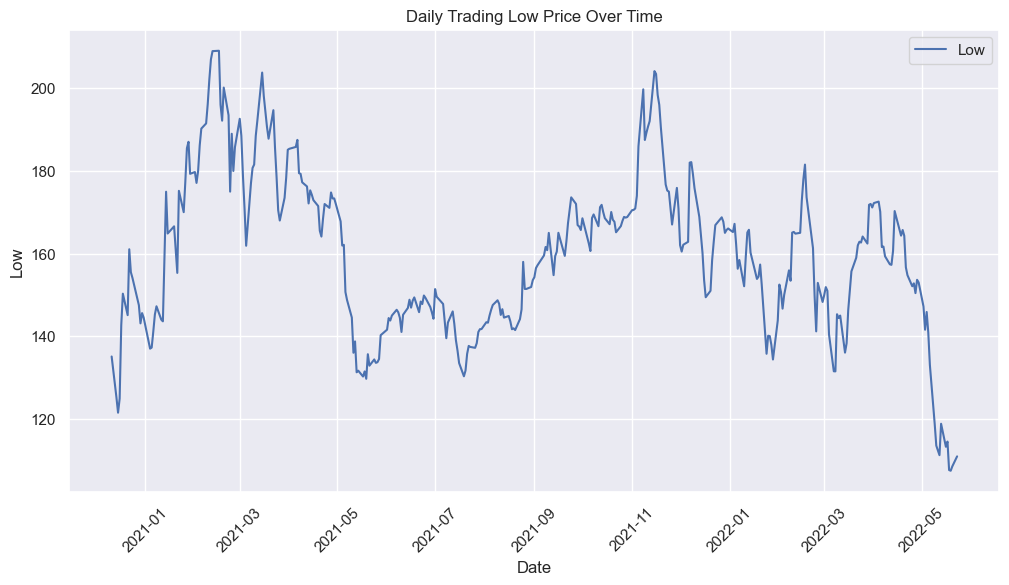

In [19]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Low')
plt.title('Daily Trading Low Price Over Time')
plt.xticks(rotation=45)

plt.grid(True)
plt.legend()
plt.show()

## Perubahan AirBnB Close Price Setiap Harinya

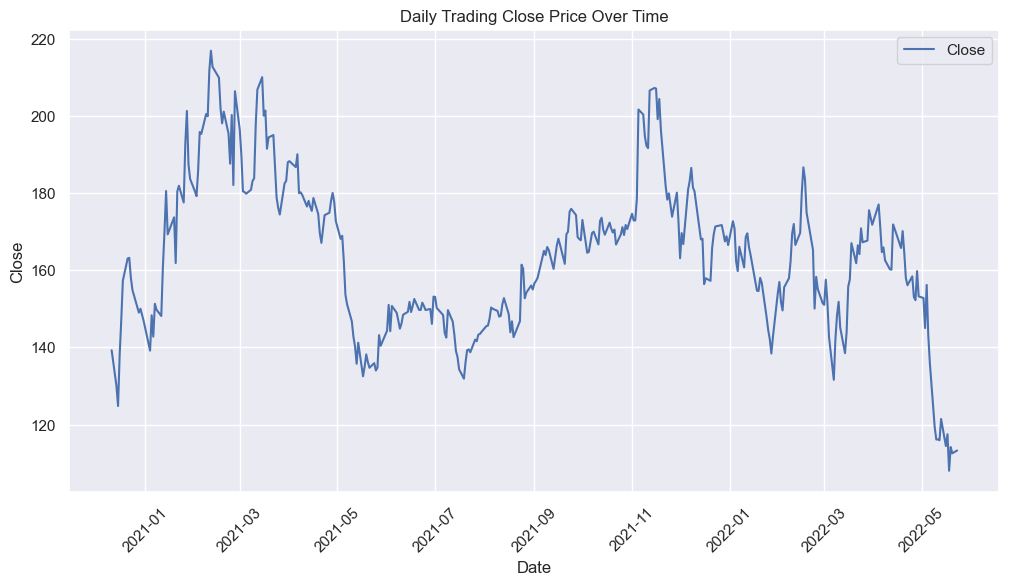

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Daily Trading Close Price Over Time')
plt.xticks(rotation=45)

plt.grid(True)
plt.legend()
plt.show()

## Train Test Split
1. Menggunakan 'Adj Close' sebagai target column
2. Menggunakan Open, High, Low, dan Volume sebagai atribut

In [21]:
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close']

In [24]:
#test size 20% dan train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# membuat objek random forest regressor dengan menambahkan n_jobs
rf = RandomForestRegressor()

# menentukan parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'random_state': [0, 42]
}

# membuat objek gridsearchcv
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')

# memasukkan gridsearchcv ke dalam training data
grid_search.fit(X_train, y_train)

# mencetak hyperparameter terbaik
print(f'Best Hyperparameters: {grid_search.best_params_}')


c:\Users\Rama Hendraloka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Rama Hendraloka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Rama Hendraloka\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Rama Hendraloka\AppData\Local\Programs\Python\

Best Hyperparameters: {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}
